# Hyperparameters in Machine Learning

### Hyperparameters in Machine Learning
- Hyperparameters are external configurations set before training that control how the model learns.
- They are not learned from the data.
- Hyperparameters are those parameters that are explicitly defined by the user to control the learning process.
- The best value can be determined either by the rule of thumb or by trial and error.

| Type               | Description                             |
| ------------------ | --------------------------------------- |
| **Parameter**      | Learned during training (e.g., weights) |
| **Hyperparameter** | Set manually before training            |


### Examples of Hyperparameters

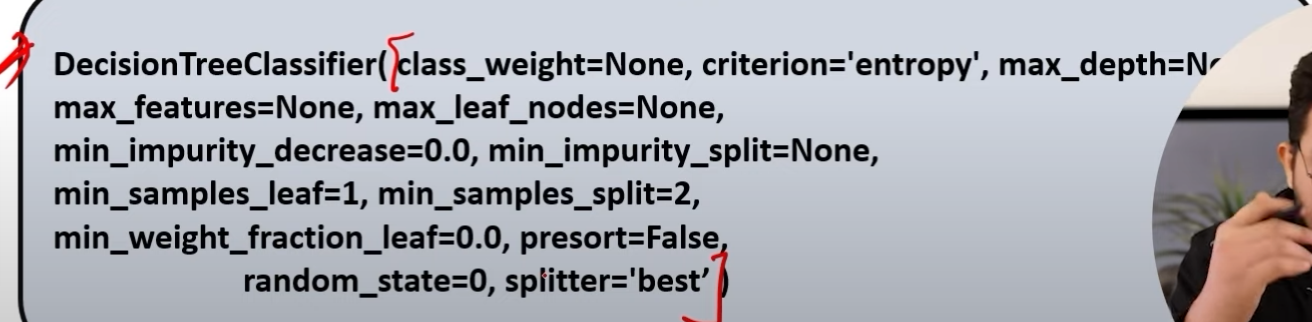

| Model Type            | Hyperparameters                                   |
| --------------------- | ------------------------------------------------- |
| **Linear Regression** | Learning rate, regularization strength            |
| **KNN**               | Number of neighbors `k`, distance metric          |
| **SVM**               | Kernel type, `C`, `gamma`                         |
| **Decision Trees**    | Max depth, min samples split, criterion           |
| **Random Forest**     | Number of trees, max depth                        |
| **Neural Networks**   | Learning rate, batch size, number of layers, etc. |


---

### Common Hyperparameters Across Models
##### 1. Learning Rate (α)
- Controls how big the steps are during gradient descent.
- Too high → overshoot minima
- Too low → very slow learning

##### 2. Number of Epochs
- How many times the model sees the full dataset during training.
- Too low → underfitting
- Too high → overfitting

##### 3. Batch Size
- Number of samples used to compute gradient in one step.
- Small batch → noisy updates (SGD style)
- Large batch → smoother updates (faster but uses more memory)

##### 4. Regularization (L1, L2)
- Prevent overfitting by penalizing large weights.
- L1 (Lasso): encourages sparsity (some weights = 0)
- L2 (Ridge): penalizes large weights

##### 5. Dropout Rate (in Neural Networks)
- Randomly disables neurons during training to prevent overfitting.


---

##### Goal(Hyperparameter Tuning):
- Find the best combination of hyperparameters that improves validation/test performance.
- it reduces overfitting

## Tuning Methods:

| Method                           | Description                                             |
| -------------------------------- | ------------------------------------------------------- |
| **Manual Search**                | Try different values manually                           |
| **Grid Search**                  | Try all combinations in a grid of hyperparameter values |
| **Random Search**                | Try random combinations (more efficient)                |
| **Bayesian Optimization**        | Intelligent search using probability models             |
| **Optuna / Hyperopt / Ray Tune** | Libraries for automated optimization                    |


| Strategy           | Description                | Pros                   | Cons                      |
| ------------------ | -------------------------- | ---------------------- | ------------------------- |
| Manual Search      | Try manually               | Simple                 | Not scalable              |
| Grid Search        | Try all combinations       | Systematic, reliable   | Slow for large grids      |
| Random Search      | Try random combinations    | Faster than grid       | May miss best             |
| Bayesian Opt       | Probabilistic smart search | Efficient, scalable    | More complex to implement |
| Optuna/Keras Tuner | Automated libraries        | Best for deep learning | Need to learn APIs        |


- models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem.

 The two best strategies for hyperparameter tuning are:
- GridSearchCV
- RandomizedSearchCv

---

### Hyperparameters in Deep Learning

| Hyperparameter        | Description                         |
| --------------------- | ----------------------------------- |
| Learning Rate         | Controls weight update step size    |
| Batch Size            | Number of samples per training step |
| Number of Layers      | Model depth                         |
| Neurons per Layer     | Model width                         |
| Activation Functions  | ReLU, Sigmoid, Tanh, etc.           |
| Optimizer             | SGD, Adam, RMSprop                  |
| Dropout Rate          | Prevent overfitting                 |
| Weight Initialization | Affects convergence                 |


----
----

# Hyperparameter Tuning

### What is Hyperparameter Tuning
- Hyperparameter Tuning is the process of selecting the best combination of hyperparameters that result in optimal performance on unseen data.
- Hyperparameter Tuning is the process of selecting the best combination of hyperparameters that result in optimal performance on unseen data.

### Why Hyperparameter Tuning Matters
- Prevents underfitting (model too simple)
- Prevents overfitting (model too complex)
- Achieves generalization (good on both train & test data)

### Common Hyperparameters to Tune

| Algorithm            | Key Hyperparameters                                                       |
| -------------------- | ------------------------------------------------------------------------- |
| Linear/Logistic Reg. | `C`, `penalty`, `solver`                                                  |
| KNN                  | `n_neighbors`, `metric`                                                   |
| SVM                  | `C`, `kernel`, `gamma`                                                    |
| Decision Tree        | `max_depth`, `min_samples_split`                                          |
| Random Forest        | `n_estimators`, `max_features`, `max_depth`                               |
| Neural Networks      | `learning rate`, `batch size`, `epochs`, `layers`, `dropout`, `optimizer` |


## Tuning Strategies

##### 1. Manual Search
- Try different combinations based on domain knowledge.

🧪 Simple, but inefficient.

##### 2. Grid Search (Exhaustive Search)
- Tries every combination from a grid of possible values.
```
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
```

- ✅ Pros: Finds best combination
- ❌ Cons: Very slow on large grids

#### 3. Random Search (Random Combinations)
- Selects random combinations of hyperparameters.

```
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(3, 20)
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
```
- ✅ Faster than GridSearch
- ❌ May miss the best if not enough iterations

##### 4. Bayesian Optimization (Smart Search)
- Builds a probabilistic model of the objective function.
- Chooses the most promising values using Bayesian reasoning.

Libraries:
- Optuna
- Hyperopt
- Scikit-optimize

🧠 Finds best results with fewer evaluations.
Example with Optuna:
```
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, X_train, y_train, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print(study.best_params)
```

#### Automated Tuning Tools

| Tool            | Description                             |
| --------------- | --------------------------------------- |
| **Optuna**      | Fast and powerful Bayesian tuner        |
| **Keras Tuner** | Hyperparameter search for deep learning |
| **Ray Tune**    | Scalable hyperparameter search          |
| **Hyperopt**    | Tree-structured Parzen Estimators (TPE) |


##### Evaluation During Tuning
- Most tuners use cross-validation for reliable performance.
```
from sklearn.model_selection import cross_val_score
```
You can choose metrics:
- Accuracy
- F1-score (for imbalanced data)
- ROC-AUC
- MAE/MSE (for regression)

##### How to Choose What to Tune

| If using...        | Focus on...                                      |
| ------------------ | ------------------------------------------------ |
| **Simple model**   | `regularization`, `max_depth`                    |
| **Tree model**     | `max_depth`, `min_samples_split`, `n_estimators` |
| **Neural Network** | `learning_rate`, `epochs`, `layers`, `dropout`   |
